In [224]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile
import locale

pd.set_option("display.max_columns", 50)
locale.setlocale( locale.LC_ALL, '' )

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [ ]:
# debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names






# LAND VALUE DATA

In [279]:
# checking structure of land value data
zip_path = Path("data/land_value_data/LV_20170701.zip")
zf = zipfile.ZipFile(zip_path)
start_time = time.time()

test_df = pd.read_csv(zf.open("001_LAND_VALUE_DATA_20170701.csv"), dtype=dtype_dict)

elapsed_time = time.time() - start_time
print(elapsed_time)

test_df.sample(100)

0.16342592239379883


,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
9024,1,CESSNOCK,3828,NORMAL,NaN,NaN,60,RUBY ST,BELLBIRD,2325.0,8/D/7856,R2,853.600,M,01/07/2016,133000.0,14A(1),6A(1),01/07/2015,128000.0,14A(1),6A(1),01/07/2014,122000.0,14A(1),6A(1),01/07/2013,116000.0,14A(1),6A(1),01/07/2012,114000.0,14A(1),6A(1),NaN
16194,1,CESSNOCK,15787,NORMAL,NaN,NaN,12,TEECE ST,WESTON,2326.0,34/264038,R2,570.700,M,01/07/2016,99200.0,14A(1),6A(1),01/07/2015,93800.0,14A(1),6A(1),01/07/2014,90700.0,14A(1),6A(1),01/07/2013,86100.0,14A(1),6A(1),01/07/2012,82000.0,14A(1),6A(1),NaN
14233,1,CESSNOCK,9980,NORMAL,NaN,NaN,74,BOWDEN ST,HEDDON GRETA,2321.0,22/9/3816,R2,809.400,M,01/07/2016,172000.0,14A(1),6A(1),01/07/2015,166000.0,14A(1),6A(1),01/07/2014,158000.0,14A(1),6A(1),01/07/2013,158000.0,14A(1),6A(1),01/07/2012,150000.0,14A(1),6A(1),NaN
2145,1,CESSNOCK,4127,NORMAL,NaN,NaN,369,WOLLOMBI RD,BELLBIRD,2325.0,30/7802,R2,657.600,M,01/07/2016,115000.0,14A(1),6A(1),01/07/2015,109000.0,14A(1),6A(1),01/07/2014,98700.0,14A(1),6A(1),01/07/2013,94000.0,14A(1),6A(1),01/07/2012,92200.0,14A(1),6A(1),NaN
2420,1,CESSNOCK,6495,NORMAL,NaN,NaN,8,DUDLEY ST,CESSNOCK,2325.0,4/7/6102,R3,669.050,M,01/07/2016,167000.0,14A(1),6A(1),01/07/2015,162000.0,14A(1),6A(1),01/07/2014,157000.0,14A(1),6A(1),01/07/2013,152000.0,14A(1),6A(1),01/07/2012,145000.0,14A(1),6A(1),NaN
1908,1,CESSNOCK,8850,NORMAL,NaN,NaN,11,WILLIAM ST,CESSNOCK,2325.0,"22, 23/H/4927",R3,1226.000,M,01/07/2016,185000.0,14A(1),6A(1),01/07/2015,180000.0,14A(1),6A(1),01/07/2014,175000.0,14A(1),6A(1),01/07/2013,170000.0,14A(1),6A(1),01/07/2012,170000.0,14A(1),6A(1),NaN
9408,1,CESSNOCK,8388,NORMAL,NaN,NaN,1,SERGEANT ST,CESSNOCK,2325.0,D/307014,R3,677.800,M,01/07/2016,136000.0,14A(1),6A(1),01/07/2015,132000.0,14A(1),6A(1),01/07/2014,128000.0,14A(1),6A(1),01/07/2013,124000.0,14A(1),6A(1),01/07/2012,118000.0,14A(1),6A(1),NaN
150,1,CESSNOCK,2884415,NORMAL,NaN,NaN,39,DUNLOP DR,PAXTON,2325.0,8/1034264,R5,2.018,H,01/07/2016,291000.0,14A(1),6A(1),01/07/2015,281000.0,14A(1),6A(1),01/07/2014,275000.0,14A(1),6A(1),01/07/2013,275000.0,14A(1),6A(1),01/07/2012,246000.0,14A(1),6A(1),NaN
24104,1,CESSNOCK,3988431,NORMAL,NaN,NaN,24,ABBEY CCT,WESTON,2326.0,14/1226807,R5,4553.000,M,01/07/2016,220000.0,27B,6A(1),01/07/2015,216000.0,27B,6A(1),01/07/2014,NaN,NaN,NaN,01/07/2013,NaN,NaN,NaN,01/07/2012,NaN,NaN,NaN,NaN
11998,1,CESSNOCK,14602,NORMAL,NaN,NaN,12,WICKHAM ST,STANFORD MERTHYR,2327.0,15/13/758926,R2,1012.000,M,01/07/2016,139000.0,14A(1),6A(1),01/07/2015,134000.0,14A(1),6A(1),01/07/2014,128000.0,14A(1),6A(1),01/07/2013,123000.0,14A(1),6A(1),01/07/2012,121000.0,14A(1),6A(1),NaN


In [249]:
# aggregating land value csv files

def read_csv_and_add_column(csv):
    df = pd.read_csv(zf.open(csv), 
                     encoding="ISO-8859-1", 
                     error_bad_lines=False,
                     dtype=dtype_dict)
    df["SOURCE CSV FILENAME"] = csv
    return df


def get_namelist_csv_only(zf):
    zf_list = zf.namelist()
    csv_list = [k for k in zf_list if ".csv" in k]
    return csv_list


zip_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))
land_value_csv_list = sorted(Path("data/land_value_data").glob("**/*.csv"))
land_value_csv_list_stems =  [k.stem for k in land_value_csv_list]

# loop through all zips, if zip isn't processed then process it
for zip_path in zip_path_list:
    if (zip_path.stem + "_combined") not in land_value_csv_list_stems:
        start_time = time.time()

        zf = zipfile.ZipFile(zip_path)

        zf_df = pd.concat([read_csv_and_add_column(csv) for csv in get_namelist_csv_only(zf)], sort=False)
        zf.close()

        zf_df["SOURCE ZIP FILENAME"] = csv

        zf_df.to_csv(Path("data/land_value_data/{}_combined.csv".format(zip_path.stem)), compression="zip")

        elapsed_time = time.time() - start_time
        print(zip_path.stem + " - " + str(elapsed_time))
    else:
        print("{} has already been processed".format(zip_path.stem))

LV_20170701 has already been processed
LV_20170801 has already been processed
LV_20170901 has already been processed
LV_20171001 has already been processed
LV_20171101 has already been processed
LV_20171201 has already been processed
LV_20180101 has already been processed
LV_20180201 has already been processed
LV_20180301 has already been processed
LV_20180401 has already been processed
LV_20180501 has already been processed
LV_20180601 has already been processed
LV_20180701 has already been processed
LV_20180801 has already been processed
LV_20180901 has already been processed
LV_20181001 has already been processed
LV_20181101 has already been processed
LV_20181201 has already been processed
LV_20190101 has already been processed
LV_20190201 has already been processed
LV_20190301 has already been processed
LV_20190401 has already been processed
LV_20190501 has already been processed
LV_20190601 has already been processed
LV_20190701 has already been processed





## MARSDEN PARK ANALYSIS 

In [267]:
land_value_df_2017 = pd.read_csv(land_value_csv_list[0], compression="zip", dtype=dtype_dict)
land_value_df_2018 = pd.read_csv(land_value_csv_list[12], compression="zip", dtype=dtype_dict)
land_value_df_2019 = pd.read_csv(land_value_csv_list[24], compression="zip", dtype=dtype_dict)

def get_min_max_of_land_value_df(df):
    min_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].min(), grouping=True)
    max_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].max(), grouping=True)
    return [min_land_value, max_land_value]

#  print([get_min_max_of_land_value_df(land_value_df_2017),
#         get_min_max_of_land_value_df(land_value_df_2018),
#         get_min_max_of_land_value_df(land_value_df_2019)])

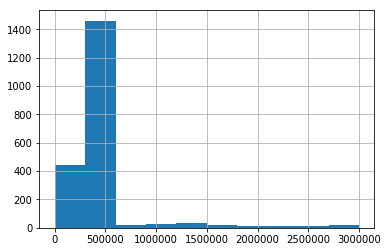

In [271]:
# land value histogram
land_value_df_2017["LAND VALUE 1"][(land_value_df_2017["SUBURB NAME"] == "MARSDEN PARK")].hist(range=(0, 3000000))




## NSW ANALYSIS


In [324]:
sorted(land_value_df_2017["PROPERTY NAME"][~land_value_df_2017["PROPERTY NAME"].isnull()].unique())

[' ',
 ' ACCESS, COMMON ROOM & LANDSCAPED AREA',
 ' ALBURY HIGH SCHOOL',
 ' ASSISTANT STATION MASTERS RESIDENCE',
 ' BABY HEALTH CENTRE',
 ' BICENTENNIAL FLORA PARK',
 ' BLOOMVALE',
 ' BOWRAL HIGH SCHOOL',
 ' BUILDING F',
 ' COOPER PARK (PART)',
 ' DEDICATED PUBLIC RESERVE',
 ' DEGOTARDI PARK',
 ' FARM 268',
 ' FEURBAIX',
 ' GHOST GUMS',
 ' GIRL GUIDES HALL',
 ' GREEN POINT OBSERVATORY',
 ' GUNDY & MAXWELLTON',
 ' HALL',
 ' HILDA GARDENS',
 ' JETTY ADJOINING',
 ' JOHN WRIGHT PARK',
 ' KARINYA',
 ' KENDALL RESERVE',
 ' KOORINGLE',
 ' KULOO',
 ' LOT 15 ',
 ' LT 1 ',
 ' MCDONALDS',
 ' NANAMI',
 ' NATIONAL PARK',
 ' PART BUCKIE STATION',
 ' PART DENMAN GOLF COURSE',
 ' PART RAILWAY LANDS',
 ' PART SYDNEY WATER SUPPLY PIPELINE',
 ' PART TAYLORS PLAINS',
 ' PART WILGAROON',
 ' PSH BINDOGUNDRA',
 ' PT KINGSFORD SMITH PARK',
 ' R 65994 PART FRANCIS PARK  RERVE',
 ' RECREATION DR',
 ' RIVERSIDE THEATRE',
 ' SANDELL',
 ' SITE 27',
 ' SITE 28',
 ' ST CUTHBERTS ANGLICAN CHURCH',
 ' STUCKEYS CREEK'






# CRIME DATA

In [47]:
# getting crime data
crime_suburb_data_filepath = Path("data/SuburbData2018.csv")
crime_suburb_data = pd.read_csv(crime_suburb_data_filepath)

In [6]:
# sampling data
# crime_suburb_data.sample(10)

In [48]:
# types of offences
unique_offence_categories = crime_suburb_data["Offence category"].unique()
# pd.Series(unique_offence_categories)

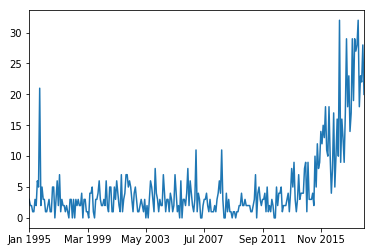

In [65]:
# filter suburb and offence category then plot
marsdenpark_data = crime_suburb_data[:][(crime_suburb_data["Suburb"] == "Marsden Park") &
                                        (crime_suburb_data["Offence category"] == "Theft")]
total_crimes_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crimes_timeseries.plot()